
# 📌 **FINAL PROJECT SUMMARY **

## **Project: Zomato Restaurant Rating Prediction (End-to-End ML Project)**

### **Objective**

To analyze Bangalore restaurant data and build a machine-learning model that predicts restaurant ratings based on cuisine, cost, location, online-order availability, votes, and restaurant type.

---

## **Data Cleaning Steps**

* Removed duplicates and unnecessary columns (`url`, `address`, `menu_item`, `reviews_list`).
* Cleaned messy columns:

  * Converted `rate` from strings like `"4.1/5"` to float.
  * Converted `cost` to numeric and removed commas.
  * Filled missing values using median or `'unknown'`.
* Grouped rare categories (frequency < 100) into `"other"` for:

  * `location`
  * `rest_type`
  * `listed_in(type)`
  * `listed_in(city)`
* Extracted **primary_cuisine** from full cuisine list.

---

## **EDA Highlights**

### 🔹 **Rating Distribution**

* Most ratings between **3.2 – 4.2** (normal distribution).

### 🔹 **Online Order & Table Booking**

* Both increase rating slightly.
* Table booking has a stronger positive effect.

### 🔹 **Cost Analysis**

* Most restaurants cost **₹300–₹700**.
* Expensive restaurants slightly higher ratings.

### 🔹 **Votes**

* Restaurants with more votes generally have higher ratings.

### 🔹 **Top Locations & Cuisines**

* Dominant locations: BTM, Koramangala, Indiranagar.
* Dominant cuisines: North Indian, Café, South Indian.
* Highest-rated cuisines: premium international cuisines (Sushi, Korean, French).

---

## **Modeling**

Used `Linear Regression`, `Random Forest`, and `XGBoost`.

### **Results:**

| Model             | MAE       | RMSE      | R²        |
| ----------------- | --------- | --------- | --------- |
| Linear Regression | 0.268     | 0.345     | 0.384     |
| **Random Forest** | **0.067** | **0.134** | **0.906** |
| XGBoost           | 0.173     | 0.244     | 0.692     |

### **Winner:**

🎯 **Random Forest with R² = 0.90** (Excellent Performance)

---

## **Feature Importance (from Random Forest)**

Top contributors:

1. **Votes** (strongest influence)
2. **Cost**
3. **Primary Cuisine**
4. **Book Table**
5. **Online Order**
6. **Restaurant Type**
7. **Location**

---

## **Conclusions**

* Ratings are influenced most by **popularity (votes)** and **pricing**.
* Premium cuisines and table-booking restaurants receive higher ratings.
* Random Forest is the best model for predicting restaurant ratings.
* This workflow replicates real-world industry ML pipelines.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
path='/content/drive/MyDrive/DATA SCIENCE/My Data Science Projects/Project1_Zomato_Rating/zomato.csv'
df=pd.read_csv(path)

In [ ]:
!find /content/drive/MyDrive -name "zomato.csv"


/content/drive/MyDrive/DATA SCIENCE/My Data Science Projects/Project1_Zomato_Rating/zomato.csv


In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.drop('url',axis=1,inplace=True)

In [ ]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.drop('address',axis=1,inplace=True)

In [ ]:
df['online_order']=df['online_order'].map({'Yes':1,'No':0})

In [ ]:
df['online_order'].unique()

array([1, 0])

In [ ]:
df['book_table']=df['book_table'].map({'Yes':1,'No':0})

In [ ]:
df['book_table'].unique()

array([1, 0])

In [ ]:
df['rate'].unique()[:30]

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5'], dtype=object)

In [ ]:
df['rate']=df['rate'].replace(['NEW','','-'],np.nan)

In [ ]:
df['rate']=df['rate'].astype(str).str.replace('/5','',regex=False)

In [ ]:
df['rate']=df['rate'].astype(float)
df.dropna(subset=['rate'],inplace=True)

In [ ]:
df['rate'].describe()

,rate
count,41665.000000
mean,3.700449
std,0.440513
min,1.800000
25%,3.400000
50%,3.700000
75%,4.000000
max,4.900000


In [ ]:
df['votes']=pd.to_numeric(df['votes'],errors='coerce')

In [ ]:
df['votes']=df['votes'].fillna(0)

In [ ]:
df['votes'].describe()

,votes
count,41665.000000
mean,351.653018
std,881.800960
min,0.000000
25%,21.000000
50%,73.000000
75%,276.000000
max,16832.000000


In [ ]:
df['votes'].unique()[:20]

array([ 775,  787,  918,   88,  166,  286,    8, 2556,  324,  504,  402,
        150,  164,  424,   90,  133,  144,   93,   13,   62])

In [ ]:
df.drop('phone',axis=1,inplace=True)

In [ ]:
df['location'].nunique()

92

In [ ]:
df['location'].unique()[:20]

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Sarjapur Road', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block'], dtype=object)

In [ ]:
df['location']=df['location'].fillna('unknown')

In [ ]:
location_counts=df['location'].value_counts()
rare_locations=location_counts[location_counts<100].index
df['location']=df['location'].replace(rare_locations,'other')

In [ ]:
df['location'].value_counts().head(20)

,count
location,
BTM,3930
Koramangala 5th Block,2319
HSR,2019
Indiranagar,1847
JP Nagar,1717
Jayanagar,1643
Whitefield,1582
Marathahalli,1443
other,1322


In [ ]:
df['rest_type']=df['rest_type'].fillna('unknown')

In [ ]:
rest_type_counts=df['rest_type'].value_counts()
rare_rest_types=rest_type_counts[rest_type_counts<100].index
df['rest_type']=df['rest_type'].replace(rare_rest_types,'other')

In [ ]:
df['rest_type'].value_counts().head(20)

,count
rest_type,
Quick Bites,13944
Casual Dining,9659
Cafe,3405
Dessert Parlor,1864
Delivery,1680
other,1621
"Takeaway, Delivery",1292
"Casual Dining, Bar",1110
Bakery,704


In [ ]:
df['dish_liked']=df['dish_liked'].fillna('unknown')

In [ ]:
df['cuisines']=df['cuisines'].fillna('unknown')

In [ ]:
df['primary_cuisine'] = df['cuisines'].apply(lambda x: x.split(',')[0].strip())

In [ ]:
df['primary_cuisine'].head(20)

,primary_cuisine
0,North Indian
1,Chinese
2,Cafe
3,South Indian
4,North Indian
5,North Indian
6,North Indian
7,Pizza
8,Cafe
9,Cafe


In [ ]:
df['primary_cuisine'].nunique()

87

In [ ]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].fillna('0')

In [ ]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')

In [ ]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [ ]:
df['approx_cost(for two people)'].describe()

,approx_cost(for two people)
count,41665.000000
mean,599.691732
std,465.260074
min,0.000000
25%,300.000000
50%,500.000000
75%,700.000000
max,6000.000000


In [ ]:
df['approx_cost(for two people)'].unique()[:20]

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000])

In [ ]:
df.drop('reviews_list', axis=1, inplace=True)

In [ ]:
df.drop('menu_item', axis=1, inplace=True)

In [ ]:
df['listed_in(type)']=df['listed_in(type)'].fillna('unknown')

In [ ]:
type_counts=df['listed_in(type)'].value_counts()
rare_types=type_counts[type_counts<100].index
df['listed_in(type)']=df['listed_in(type)'].replace(rare_types,'other')

In [ ]:
df['listed_in(type)'].value_counts()

,count
listed_in(type),
Delivery,20649
Dine-out,14207
Desserts,2732
Cafes,1526
Drinks & nightlife,1055
Buffet,855
Pubs and bars,641


In [ ]:
df['listed_in(city)']=df['listed_in(city)'].fillna('unknown')

In [ ]:
city_counts=df['listed_in(city)'].value_counts()
rare_cities=city_counts[city_counts<200].index
df['listed_in(city)']=df['listed_in(city)'].replace(rare_cities,'other')

In [ ]:
df['listed_in(city)'].value_counts()

,count
listed_in(city),
BTM,2610
Koramangala 7th Block,2390
Koramangala 4th Block,2280
Koramangala 5th Block,2277
Koramangala 6th Block,2144
Jayanagar,1928
JP Nagar,1649
Indiranagar,1555
MG Road,1532


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41665 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41665 non-null  object 
 1   online_order                 41665 non-null  int64  
 2   book_table                   41665 non-null  int64  
 3   rate                         41665 non-null  float64
 4   votes                        41665 non-null  int64  
 5   location                     41665 non-null  object 
 6   rest_type                    41665 non-null  object 
 7   dish_liked                   41665 non-null  object 
 8   cuisines                     41665 non-null  object 
 9   approx_cost(for two people)  41665 non-null  int64  
 10  listed_in(type)              41665 non-null  object 
 11  listed_in(city)              41665 non-null  object 
 12  primary_cuisine              41665 non-null  object 
dtypes: float64(1), int64(

In [ ]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

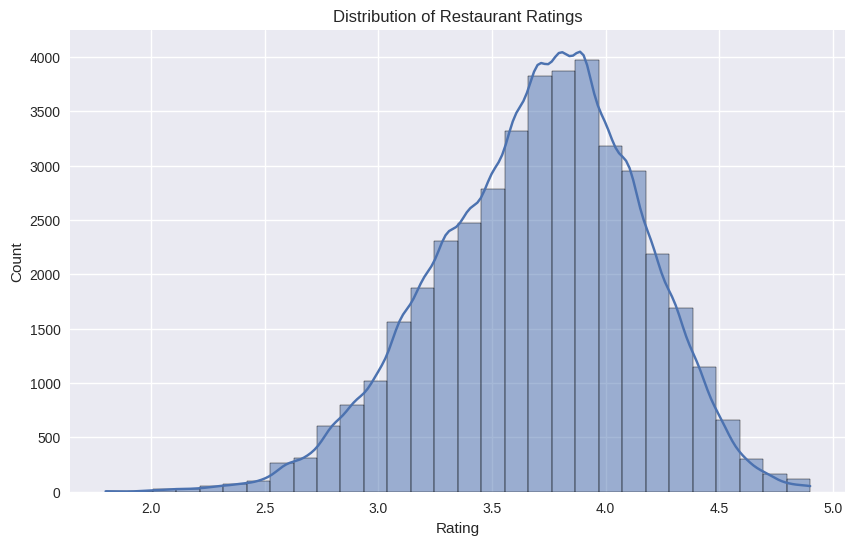

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['rate'],kde=True, bins=30)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show

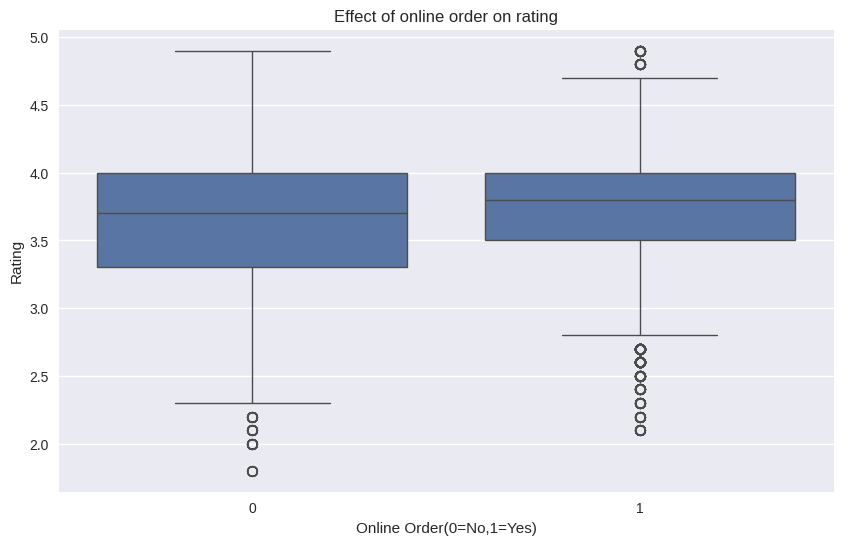

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Effect of online order on rating')
plt.xlabel('Online Order(0=No,1=Yes)')
plt.ylabel('Rating')
plt.show()

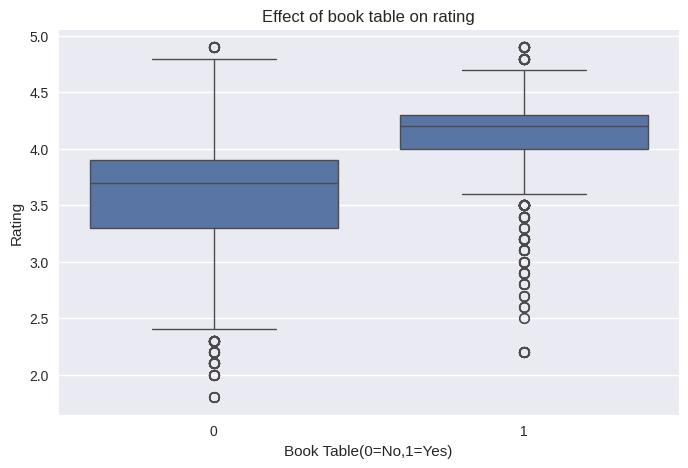

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='book_table',y='rate', data=df)
plt.title('Effect of book table on rating')
plt.xlabel('Book Table(0=No,1=Yes)')
plt.ylabel('Rating')
plt.show()


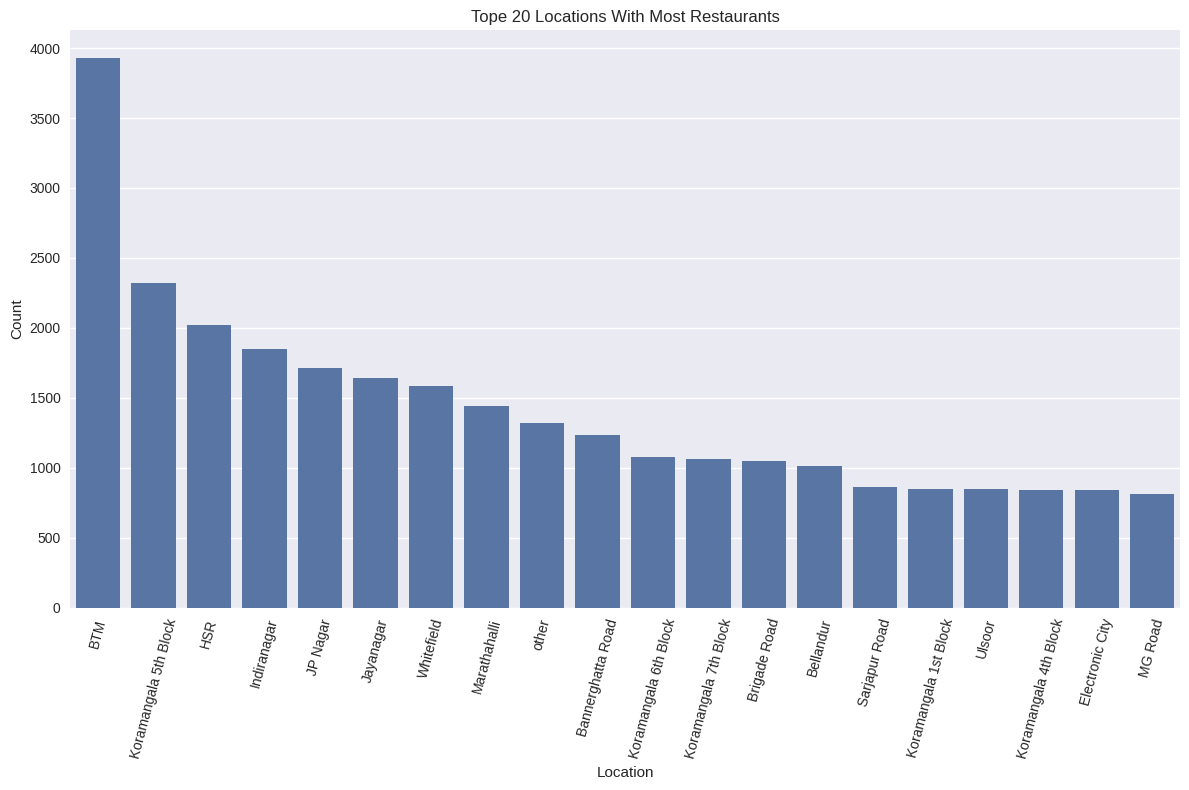

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='location',data=df,order=df['location'].value_counts().head(20).index)
plt.title('Tope 20 Locations With Most Restaurants')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=75)   # rotate more
plt.tight_layout()        # avoid cutting labels
plt.show()

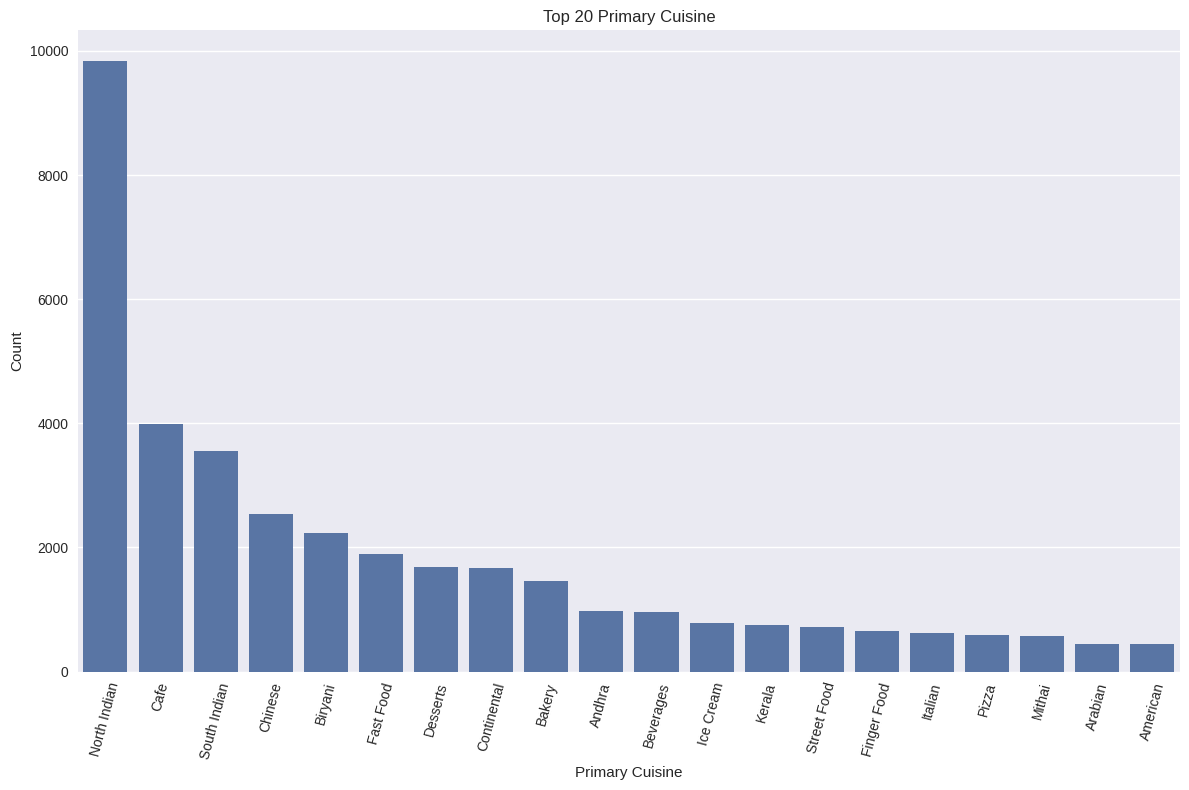

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='primary_cuisine',data=df,order=df['primary_cuisine'].value_counts().head(20).index)
plt.title('Top 20 Primary Cuisine')
plt.xlabel('Primary Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

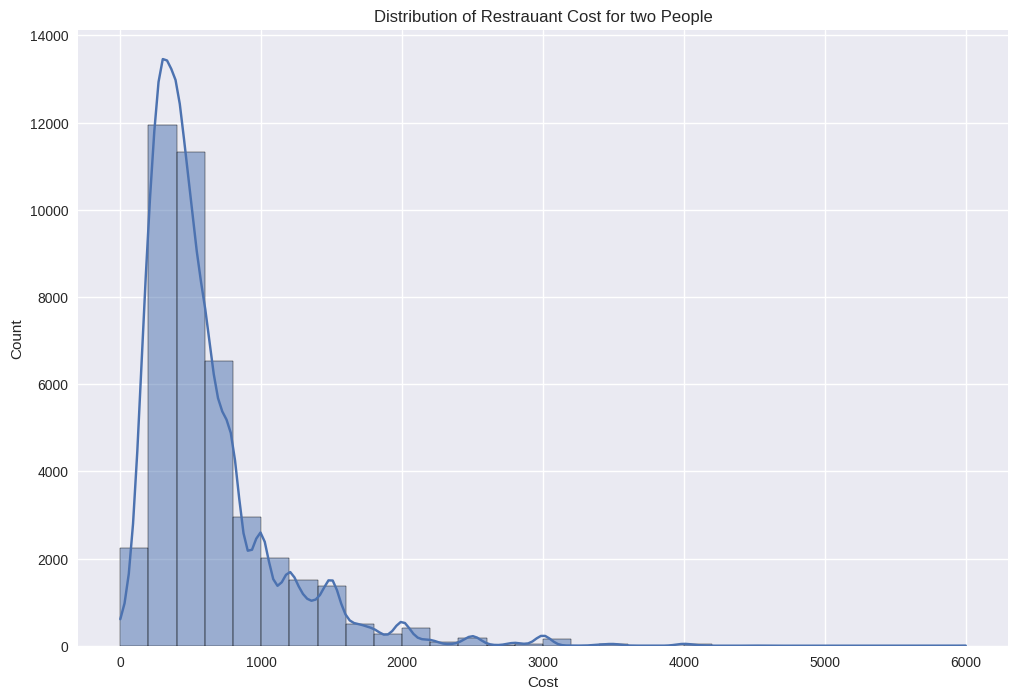

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df['approx_cost(for two people)'],kde=True, bins=30)
plt.title('Distribution of Restrauant Cost for two People')
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

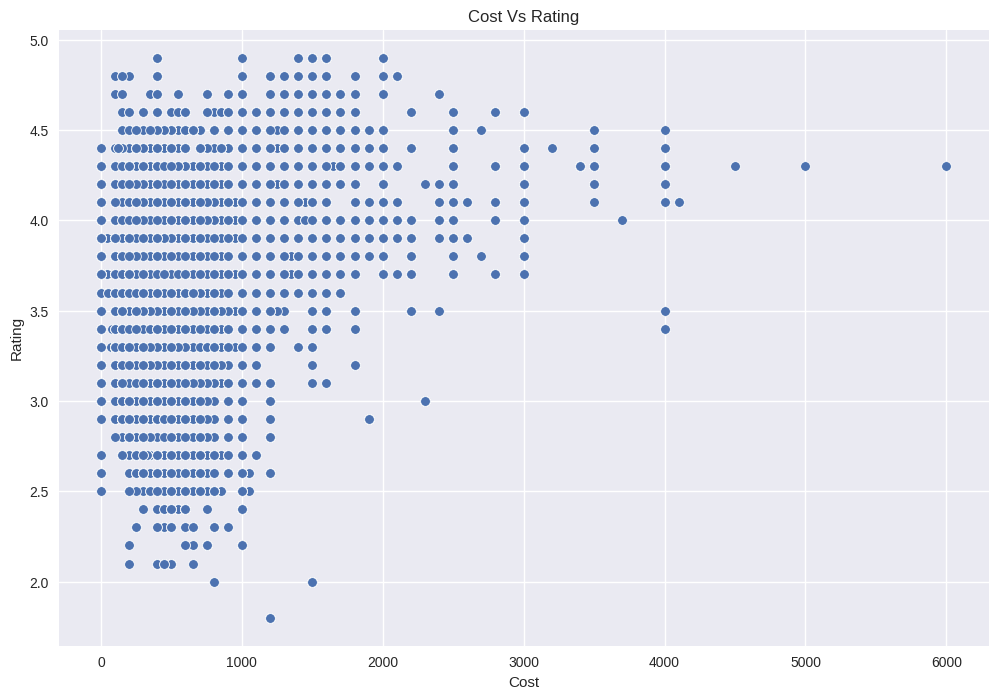

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.title('Cost Vs Rating')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.show()

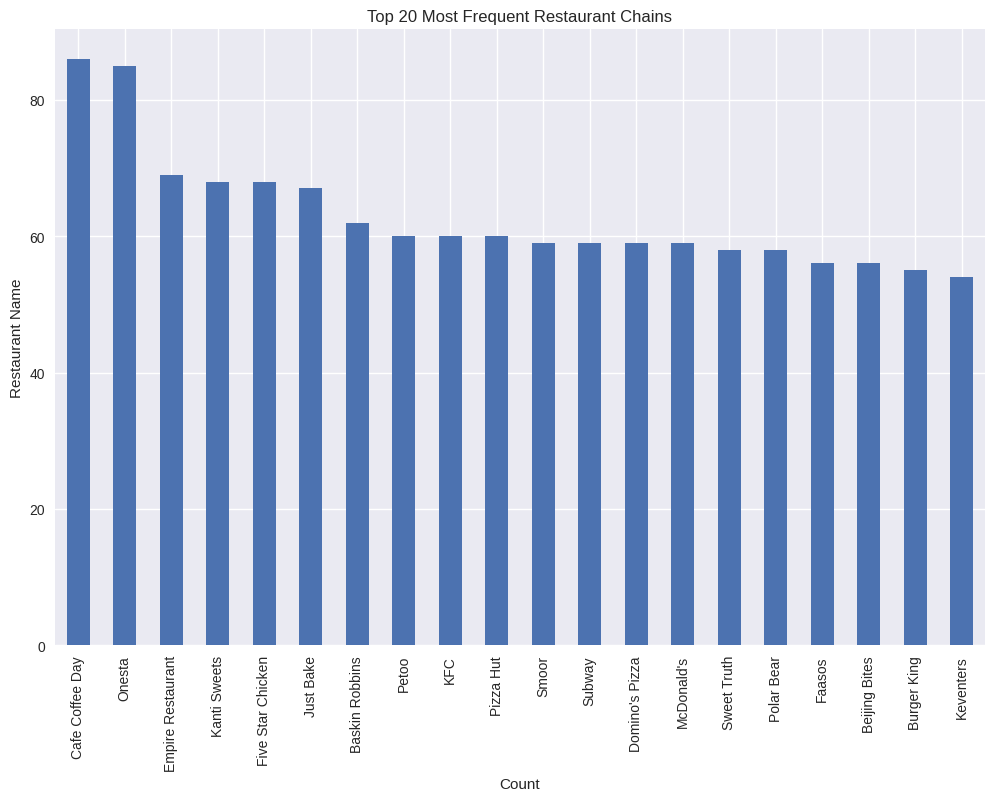

In [ ]:
plt.figure(figsize=(12,8))
df['name'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Most Frequent Restaurant Chains')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.show()

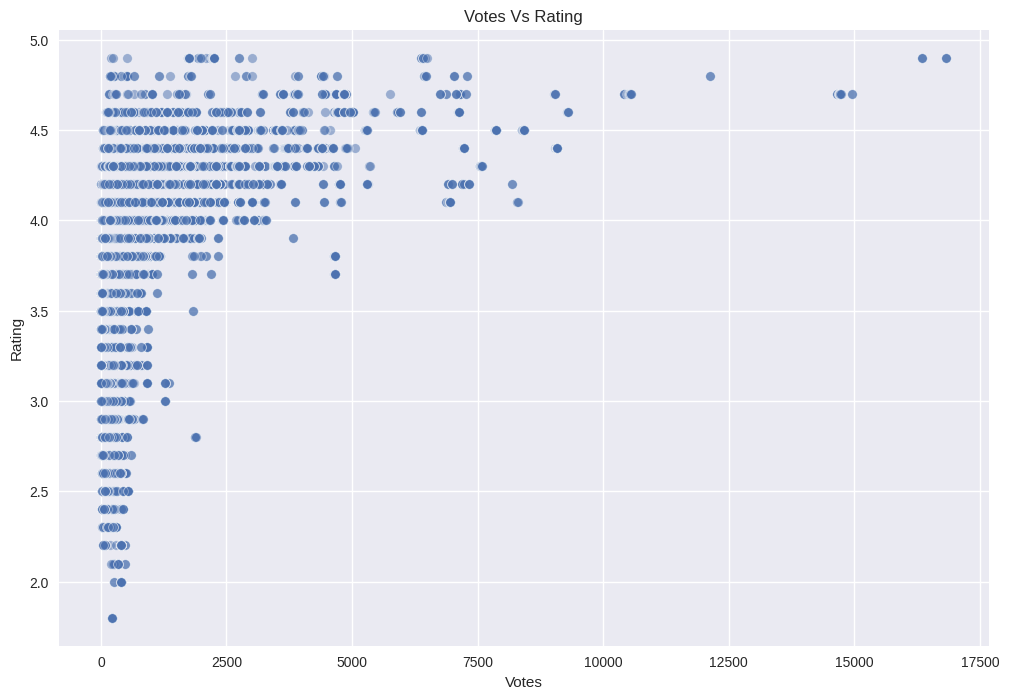

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='votes', y='rate', data=df, alpha=0.5)
plt.title('Votes Vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

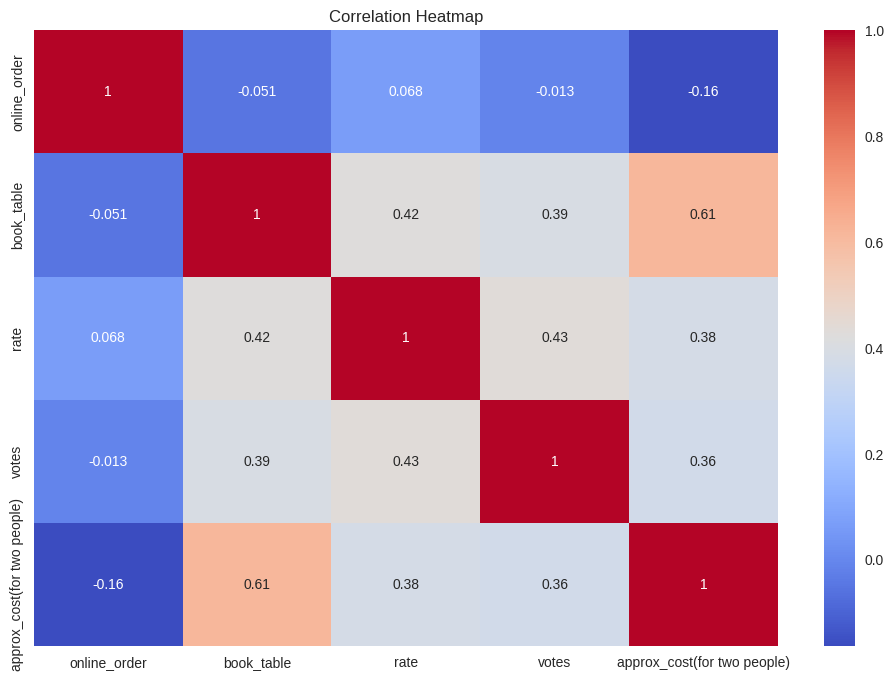

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

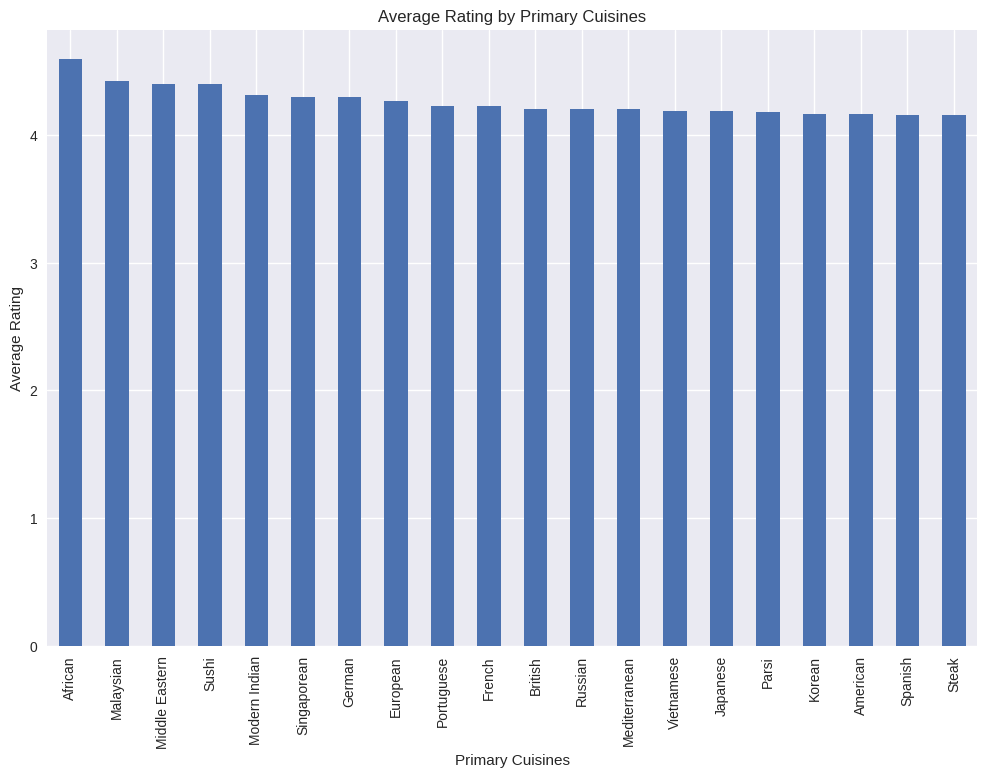

In [ ]:
plt.figure(figsize=(12,8))
df.groupby('primary_cuisine')['rate'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Average Rating by Primary Cuisines')
plt.xlabel('Primary Cuisines')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
df_ml=df.copy()
df_ml=df_ml.drop(['name','dish_liked','cuisines'],axis=1,errors='ignore')

In [ ]:
# Drop rows with NaN in 'rate' as we previously established it should be handled earlier
df_ml.dropna(subset=['rate'],inplace=True)

# Identify categorical columns
categorical_cols = df_ml.select_dtypes(include=['object', 'bool']).columns.tolist()

# Apply one-hot encoding, dropping original columns
df_ml = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)

df_ml.head()

,online_order,book_table,rate,votes,approx_cost(for two people),location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,...,primary_cuisine_Steak,primary_cuisine_Street Food,primary_cuisine_Sushi,primary_cuisine_Tamil,primary_cuisine_Tea,primary_cuisine_Thai,primary_cuisine_Tibetan,primary_cuisine_Turkish,primary_cuisine_Vietnamese,primary_cuisine_unknown
0,1,1,4.1,775,800,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0,4.1,787,800,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0,3.8,918,800,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,3.7,88,300,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,3.8,166,600,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x=df_ml.drop('rate', axis=1)
y=df_ml['rate']

In [ ]:
from sklearn.model_selection import train_test_split
# y should already be clean from df_ml.dropna()
# x should already be numerical from pd.get_dummies()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred_lr=lr.predict(x_test)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
rmse_lr=np.sqrt(mean_squared_error(y_test,y_pred_lr))
r2_lr=r2_score(y_test,y_pred_lr)

mae_lr,rmse_lr,r2_lr

(0.2681000798090936, np.float64(0.34506321494989023), 0.38454017352619474)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf=rf.predict(x_test)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))
r2_rf=r2_score(y_test,y_pred_rf)

mae_rf,rmse_rf,r2_rf

(0.06732412577455528, np.float64(0.1344545696282675), 0.9065555493366453)

In [ ]:
!pip install xgboost --quiet
from xgboost import XGBRegressor

xgb=XGBRegressor(n_estimators=100,random_state=42)
xgb.fit(x_train,y_train)

y_pred_xgb=xgb.predict(x_test)
mae_xgb=mean_absolute_error(y_test,y_pred_xgb)
rmse_xgb=np.sqrt(mean_squared_error(y_test,y_pred_xgb))
r2_xgb=r2_score(y_test,y_pred_xgb)

mae_xgb,rmse_xgb,r2_xgb

(0.17325815152509666, np.float64(0.2440716082377686), 0.6920807026573196)

In [ ]:
results=pd.DataFrame({'Model':['Linear Regression','Random Forest','XGBoost'],'MAE':[mae_lr,mae_rf,mae_xgb],'RMSE':[rmse_lr,rmse_rf,rmse_xgb],'R2':[r2_lr,r2_rf,r2_xgb]})

In [ ]:
results

,Model,MAE,RMSE,R2
0,Linear Regression,0.268100,0.345063,0.384540
1,Random Forest,0.067324,0.134455,0.906556
2,XGBoost,0.173258,0.244072,0.692081


“Random Forest significantly outperforms Linear Regression and XGBoost with an R² of 0.90, making it the best model for predicting restaurant ratings in this dataset.”

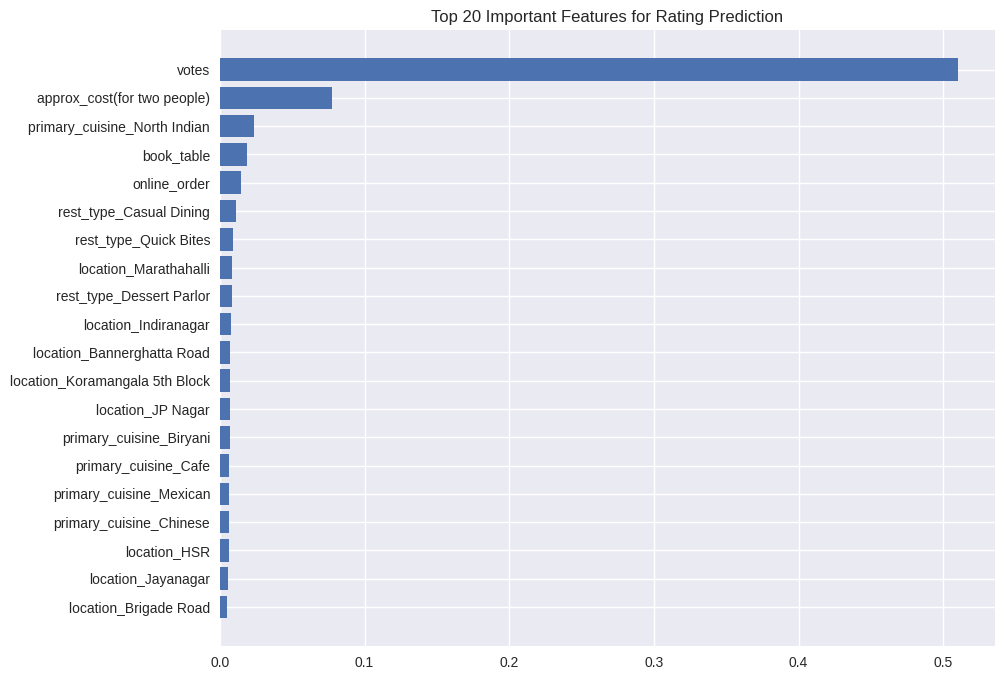

In [ ]:

importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # top 20 features

plt.figure(figsize=(10,8))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), x.columns[indices])
plt.title('Top 20 Important Features for Rating Prediction')
plt.show()
